In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy
%matplotlib inline
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.dpi'] = 75
import seaborn as sns

# 3.A

#### preprocess done on the file: 
Removed all the rows that contains !. and started working on the file from line starting with Class.

Then I collected from each line the first item and set that as header for the column

In [355]:
df = pd.read_csv('AMI_GSE66360_series_matrix.csv', index_col=0, header=None).T
df

,Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
1,H,GSM1620819,5.866377893,8.22579012,6.17973231,6.179477974,2.792047952,9.290410779,6.998285145,5.348943925,...,13.257325,13.266235,14.57123,14.276568,4.504659,3.139334,2.747015,2.651554,3.413429,3.140612
2,H,GSM1620820,4.948736331,7.525865369,6.628137025,6.58288903,2.69571445,9.462275035,6.558214949,5.410884095,...,13.59386,13.517013,14.738834,14.341233,4.409226,3.039961,2.638606,2.643615,3.399063,3.132691
3,H,GSM1620821,5.148384393,7.764636529,5.859151477,6.602134766,2.580181122,9.116776316,6.851622539,5.254073031,...,13.372759,13.416583,14.627181,14.318568,4.310076,3.220109,2.495261,2.626028,3.53997,3.698396
4,H,GSM1620822,5.064418945,7.198461482,5.974135101,6.545904723,2.712123845,9.134584186,7.357827486,5.242139865,...,13.490226,13.494827,14.754124,14.363297,4.439311,3.263782,2.544199,2.504958,3.396225,3.638612
5,H,GSM1620823,5.017832878,7.831450258,6.793079158,5.911542321,2.723686912,9.582343511,7.283872601,5.219483996,...,13.236785,13.330192,14.548389,14.263677,4.562883,3.138524,2.50663,2.609707,3.43472,3.577649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,M,GSM1620913,6.472517225,8.261421952,6.367759272,6.440978114,3.73013912,7.355729877,6.206879166,6.217929861,...,6.601746,5.942308,7.290514,8.988511,5.567947,5.55878,5.429437,4.48794,4.254286,5.375811
96,M,GSM1620914,5.678815851,6.925752665,6.835755831,6.955883278,2.914867562,7.944294937,6.638364166,5.992343792,...,14.271037,14.163706,14.884506,14.792506,4.902195,3.416999,2.834741,2.782356,3.88208,3.744138
97,M,GSM1620915,5.653286378,7.918424183,7.577034915,6.499215058,3.013901455,8.563122679,7.379567509,5.766028609,...,13.898616,13.682425,14.884506,14.783801,5.239906,3.699181,3.249683,3.056727,3.649827,4.021536
98,M,GSM1620916,6.013841046,7.442701377,7.147417202,6.587065112,2.729319786,8.699221635,6.598349589,5.577456268,...,13.847006,13.551593,14.858066,14.778166,4.556134,3.48528,2.711413,2.833818,3.52341,3.812564


## 1 + 2
#### 1) How many genes profiled?
#### 2) How many samples (subjects/patients) in total?

In [25]:
print(f"Number of genes: {df.iloc[:,2:].shape[1]}, number of patients: {df.iloc[:,2:].shape[0]}")

Number of genes: 54675, number of patients: 99


#### 3) How many samples in each class?

In [26]:
df["Class"].value_counts()

H    50
M    49
Name: Class, dtype: int64

#### 4) If there are missing values, then remove the entire row (gene) from the data matrix. How many rows left now?

In [209]:
df.dropna(axis='columns',inplace=True) #Removing columns instead of rows because columns are genes.
number_of_genes = df.shape[1]
print(f"Number of genes: {number_of_genes-2}") # the -2 is to remove the 2 columns that are Class & ID_REF

Number of genes: 54630


# TO DELETE

In [210]:
# df.to_csv("AMI_GSE66360_series_matrix_non_empty.csv", index=False)

In [356]:
# cols = list(df.columns)
# # cols.remove('ID_REF')

# genes_cols_dtypes = {c:'float' for c in cols if c not in ['Class', 'ID_REF']}
# # genes_cols_dtypes['Class'] = 'str'  

# df = pd.read_csv("AMI_GSE66360_series_matrix_non_empty.csv", dtype=genes_cols_dtypes)

#### 5) Pick 20 genes at random. Draw histograms comparing. expression levels of each of these genes in the two classes M and H.

In [278]:
import random
num_to_select = 20
random.seed(24)
genes_index_random_picked = random.sample(list(range(number_of_genes)), num_to_select)

In [213]:
df_20_genes_samples = df.iloc[:, [0] + genes_index_random_picked].copy()
cols = list(df_20_genes_samples.columns)
cols.remove('Class')
# for col in cols:
#     df_20_genes_samples[col] = df_20_genes_samples[col].astype(float)
    
classes = df_20_genes_samples.iloc[:,0]
H_vector = classes == "H"
M_vector = classes == "M"
df_20_genes_samples_class_H = df_20_genes_samples[H_vector]
df_20_genes_samples_class_M = df_20_genes_samples[M_vector]


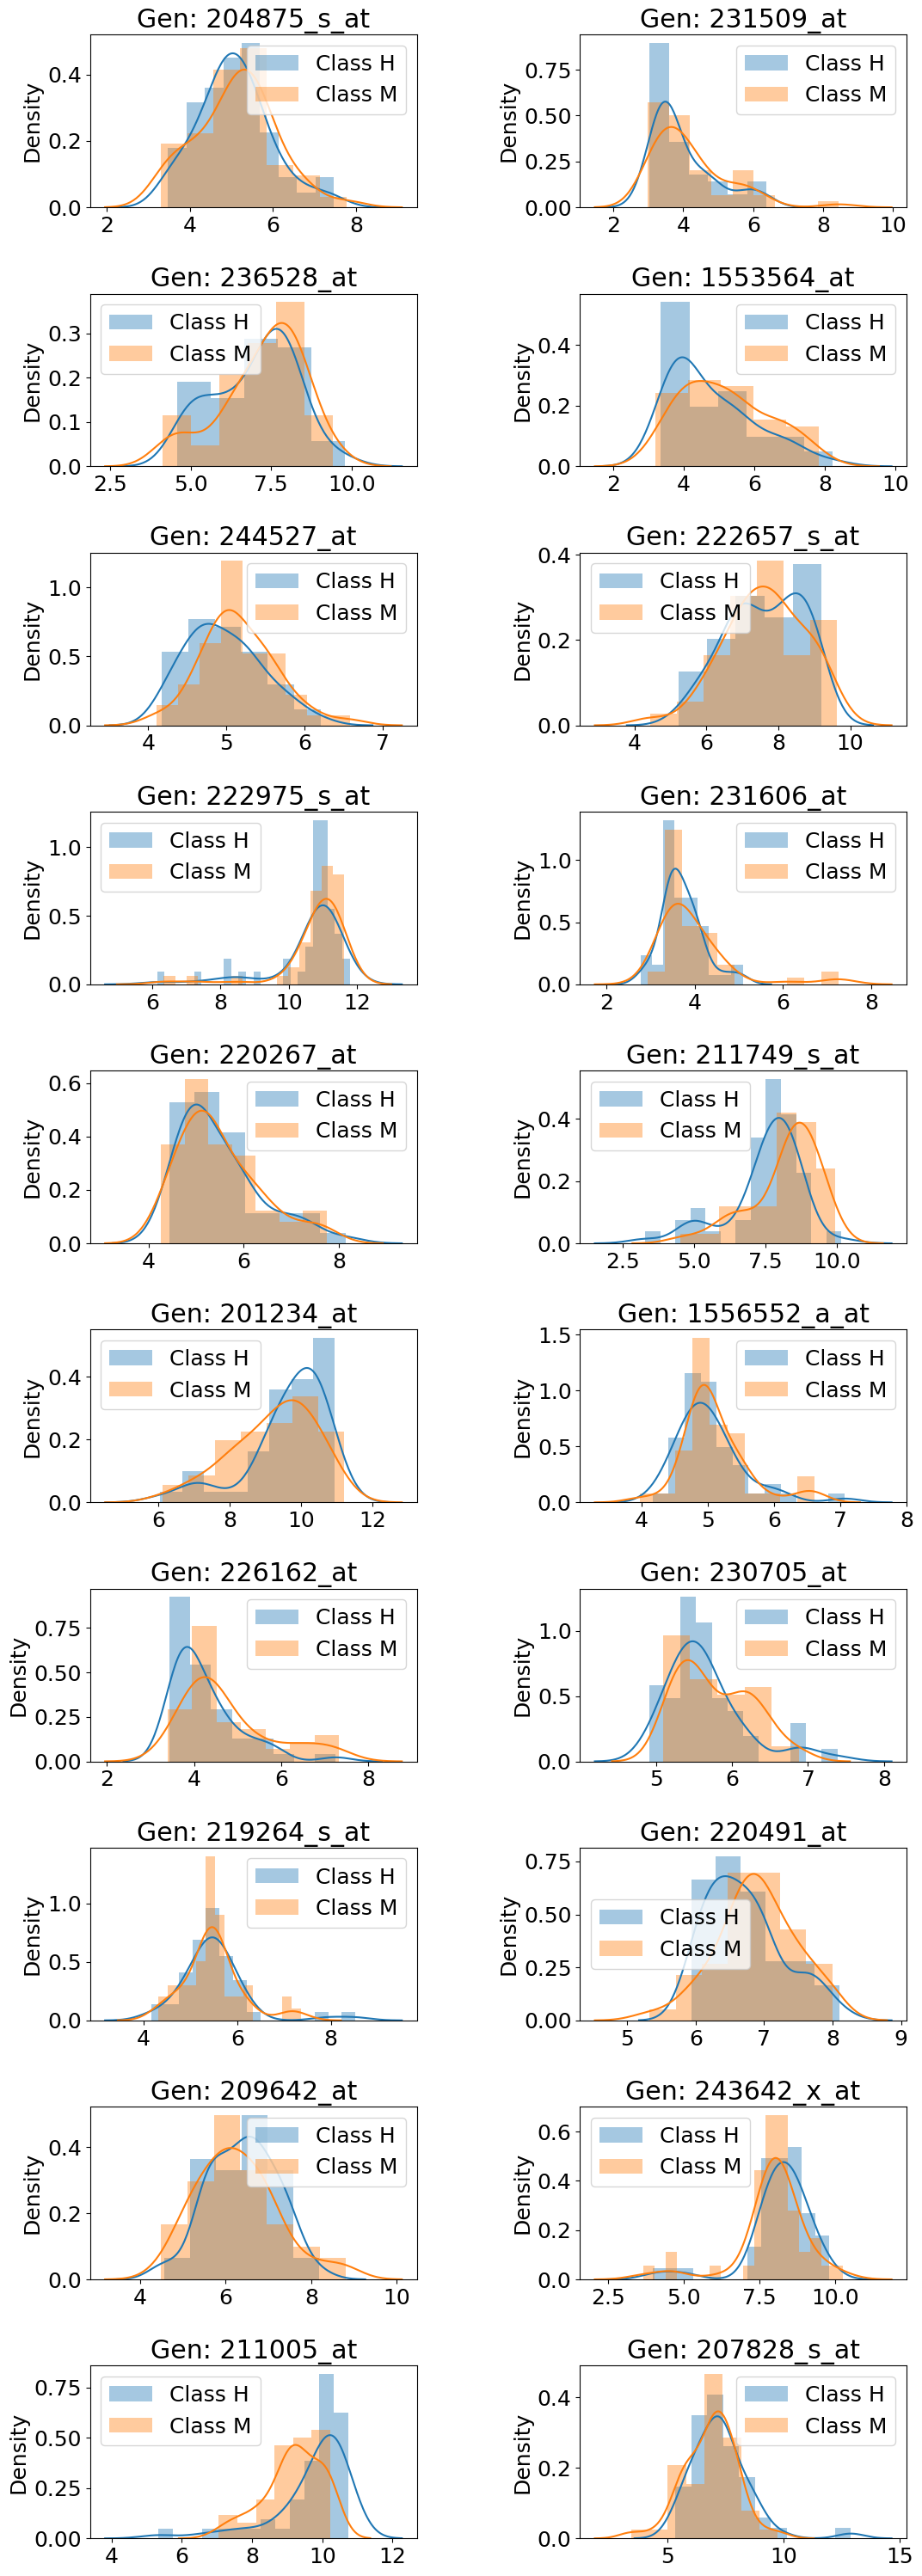

In [214]:
import warnings
warnings.filterwarnings('ignore')

import random
import numpy
from matplotlib import pyplot
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 32]
plt.rcParams['figure.dpi'] = 100

fig = plt.figure()
fig.subplots_adjust(top=0.92, bottom=0.01, left=0.0010, right=0.95, hspace=0.5, wspace=0.5)

for idx, col in enumerate(cols, start=1):
    ax = fig.add_subplot(10, 2, idx)
    h_values = df_20_genes_samples_class_H[col].to_numpy()
    m_values = df_20_genes_samples_class_M[col].to_numpy()    
    sns.distplot(h_values, ax=ax, label='Class H').set_title(f"Gen: {col}")
    sns.distplot(m_values, ax=ax, label='Class M')
    plt.legend() 


# 3.B


In [370]:
classes = df.iloc[:,0]
M_vector = classes == "M"
H_vector = classes == "H"

max_rank = 0
def calculate_RS(g):
    global max_rank
    ranks = g.rank()
    if max_rank < ranks[M_vector].sum():
        max_rank = ranks[M_vector].sum()
    return ranks[M_vector].sum()

ranked_df = df.iloc[:,2:].apply(calculate_RS, axis=0)
ranked_values = ranked_df.to_numpy()


## 1) Consider some gene, g. Under the null model (which assumes that for g there is no M vs H DE), what is the expected sum of ranks of g’s expression levels measured for samples labeled M?

According to the data, N=99, B=49 and so $E\left(RS\left(g\right)\right)={B(N+1) \over 2} = {49(99+1) \over 2} = 2450$ 

## 2) Denote this sum of ranks by RS(g). What is the maximal value, c, that RS(g) can take?

If all M class are ordered together at the bottom, then the sum of 49 (number of samples with class M) rankes from 51 to 99 is: $\sum_{i=49}^{99}i=3675$, the empirical expected value is: 3549

## Solved 3 + 4 together

## 3) Under the null model, what is the probability of RS(g) = c? (provide a formula for this and explain it)
## 4) Under the null model, what is the probability of RS(g) = c-1? what is the probability of RS(g) = c-2? (provide formulas and explain them)

To solve this, we will use the formula for normal approximation we saw in class: $Z(T) = {T-\mu \over \sigma}$, and then calc probability on it.
We found in 3.B.2 that $\mu = 2450$, so now, we need to find $\sigma$, we will use the formula we saw in class: $\sigma = \sqrt{B(N-B)(N+1) \over 12} = \sqrt{49(99-49)(99+1) \over 12} = 142.887$.    
And so for $P\left(T=C\right)$, when C=3675, we get:         
$Z\left(C+1\right) = Z\left(3676\right) = {3676-\mu \over \sigma} = 8.58$  
$Z\left(C\right) = Z\left(3675\right) = {3675-\mu \over \sigma} = 8.573$    
$Z\left(C-1\right) = Z\left(3674\right) = {3674-\mu \over \sigma} = 8.5662$    
$Z\left(C-2\right) = Z\left(3673\right) = {3673-\mu \over \sigma} = 8.559$    
  
$ P\left(T=C\right) = P\left(T=3675\right) = P\left(T \ge 3675\right) - P\left(T \ge 3676\right) = P\left(Z(T) \ge 8.573\right) - P\left(Z(T) \ge 8.58\right) = 1-norm\_cdf(8.573) - (1-norm\_cdf(8.58)) = 2.97e-19 $

$ P\left(T=C-1\right) = P\left(C-1 \leq T < C\right) = P(T \geq C-1) - P(T \geq C) = P(T \geq 3674) - P(T \geq 3675) = P\left(Z(T) \ge 8.5662\right) - P\left(Z(T) \ge 8.573\right) = 1-norm\_cdf(8.5732) - (1-norm\_cdf(8.573)) = 3.15288e-19 $

$ P\left(T=C-2\right) = P\left(C-2 \leq T < C-1\right) = P(T \geq C-2) - P(T \geq C-1) = P(T \geq 3673) - P(T \geq 3674) = P\left(Z(T) \ge 8.559\right) - P\left(Z(T) \ge 8.5662\right) = 1-norm\_cdf(8.559) - (1-norm\_cdf(8.5662)) = 3.348e-19 $    
    
Conclusion:    
$ P\left(T=C\right) = 2.97e-19 $      
$ P\left(T=C-1\right) = 3.15288e-19 $    
$ P\left(T=C-2\right) = 3.348e-19 $       

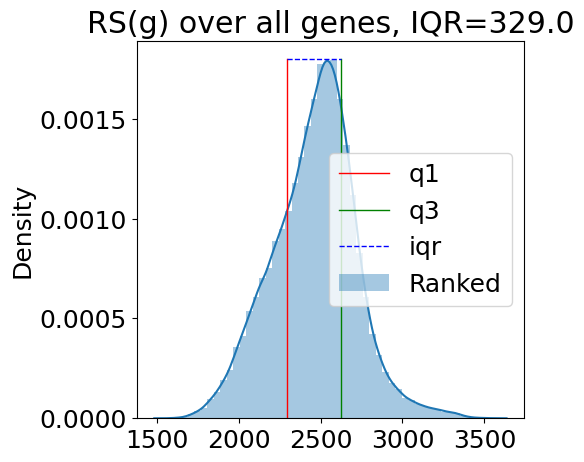

In [311]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 100

classes = df.iloc[:,0]
M_vector = classes == "M"
H_vector = classes == "H"

# First quartile (Q1) 
Q1 = np.percentile(ranked_values, 25, interpolation = 'midpoint') 
  
# Third quartile (Q3) 
Q3 = np.percentile(ranked_values, 75, interpolation = 'midpoint')

fig = plt.figure() 
sns.distplot(ranked_values, label='Ranked').set_title(f"RS(g) over all genes, IQR={Q3-Q1}")
plt.plot([Q1, Q1], [0, 0.0018], linewidth=1, color="red", label='q1')
plt.plot([Q3, Q3], [0, 0.0018], linewidth=1, color="green", label='q3')
plt.plot([Q1, Q3], [0.0018, 0.0018], "b--", linewidth=1 , label='iqr')
plt.legend() 

## 3.C

## WRS

In [472]:
from icecream import ic
from scipy.stats import norm
import math

alpha = 0.07


def calc_wilcoxon(a_b):
    a_b_sorted = sorted(a_b, key = lambda x: x[0], reverse=True)
    a_b_ranked_sorted = [(idx, ab[1]) for idx, ab in enumerate(a_b_sorted, start=1)]
    
    B = sum([x[1] for x in a_b_ranked_sorted])
    N = len(a_b_ranked_sorted)    
    mu_t = B*(N+1)/2
    sigma_t = round(math.sqrt((B*(N-B)*(N+1))/12), 2)    
    Z = lambda T: (T - mu_t)/sigma_t
    T = sum([t[0] for t in a_b_ranked_sorted if t[1]])
    Z_t = round(Z(T),2)
    
    return norm.cdf(Z(T)), norm.sf(Z(T))


df_x = df.copy()
Binary_series = df_x["Class"].apply(lambda x: 1 if x == "H" else 0)


def tuple_it(g):
    return list(zip(g,Binary_series))


df_x = df_x.iloc[:,2:].apply(tuple_it, axis=0)
df_WRS = df_x.apply(calc_wilcoxon, axis=0, result_type="expand")


print(f'There are {df_WRS.T.iloc[:,1][df_WRS.T.iloc[:,1] <= alpha].shape[0]} overexpressed, {df_WRS.T.iloc[:,0].T[df_WRS.T.iloc[:,0] <= alpha].shape[0]} underexpressed genes using WRS.')

There are 10794 overexpressed, 10669 underexpressed genes using WRS.


## T-Test

In [507]:
degrees_of_freedom = df.shape[0] - 2


def calc_ttest(a_b):
    h_samples = [x[0] for x in a_b if x[1] == 1]
    m_samples = [x[0] for x in a_b if x[1] == 0]
    var = stats.ttest_ind(m_samples, h_samples)[0]
    
    return stats.t.cdf(var, df=degrees_of_freedom), stats.t.sf(var, df=degrees_of_freedom)


df_x = df.copy()
Binary_series = df_x["Class"].apply(lambda x: 1 if x == "H" else 0)


def tuple_it(g):
    return list(zip(g,Binary_series))


df_x = df_x.iloc[:,2:].apply(tuple_it, axis=0)
df_TTEST = df_x.apply(calc_ttest, axis=0, result_type="expand")


print(f'There are {df_TTEST.T.iloc[:,1][df_TTEST.T.iloc[:,1] <= alpha].shape[0]} overexpressed, {df_TTEST.T.iloc[:,0].T[df_TTEST.T.iloc[:,0] <= alpha].shape[0]} underexpressed genes using TTest.')

There are 8517 overexpressed, 8639 underexpressed genes using TTest.
